# Homework 1 - Aprendizagem

>Maria João Rosa - ist1102506  
>Mariana Miranda - ist1102904  
>Grupo 60  

## II. Programming

1) Apply f_classif from sklearn to assess the discriminative power of the input variables.
Identify the input variable with the highest and lowest discriminative power.
Plot the class-conditional probability density functions of these two input variables.

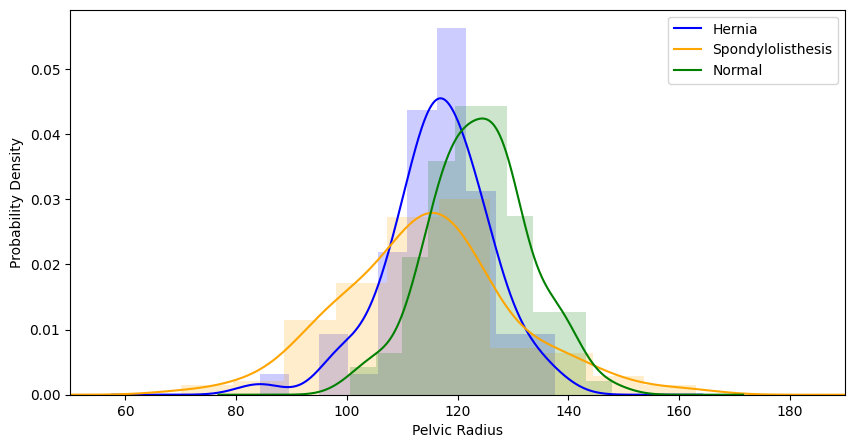

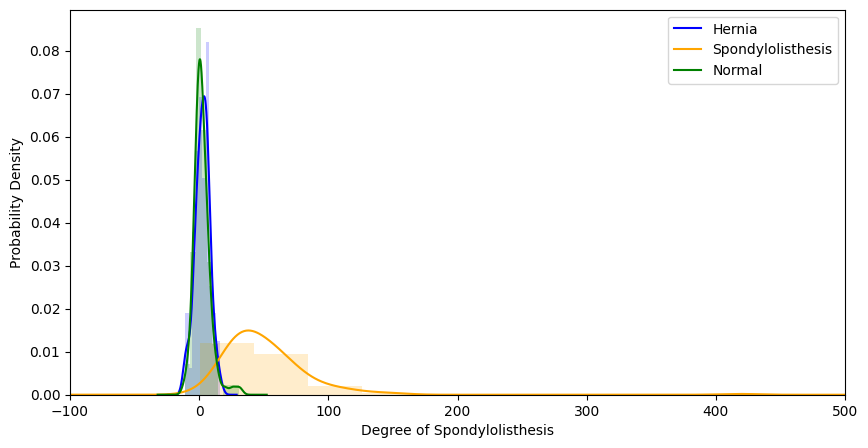

In [1]:
from sklearn.feature_selection import f_classif
import pandas as pd
from scipy.io.arff import loadarff
import matplotlib.pyplot as plt

data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])

f_values = f_classif(df.iloc[:, :-1], df.iloc[:, -1])[0]

# Variable with lowest discriminative power
lowest = df.columns[f_values.argmin()]

plt.figure(figsize=(10, 5))
plt.hist(df[lowest][df['class'] == b'Hernia'], alpha=0.2, color='blue', density=True)
plt.hist(df[lowest][df['class'] == b'Spondylolisthesis'], alpha=0.2, color='orange', density=True)
plt.hist(df[lowest][df['class'] == b'Normal'], alpha=0.2, color='green', density=True)
df[lowest][df['class'] == b'Hernia'].plot(kind='kde', label='Hernia', color='blue')
df[lowest][df['class'] == b'Spondylolisthesis'].plot(kind='kde', label='Spondylolisthesis', color='orange')
df[lowest][df['class'] == b'Normal'].plot(kind='kde', label='Normal', color='green')
plt.xlabel('Pelvic Radius')
plt.ylabel('Probability Density')
plt.xlim(50, 190)
plt.legend()
plt.show()

# Variable with highest discriminative power
highest = df.columns[f_values.argmax()]

plt.figure(figsize=(10, 5))
plt.hist(df[highest][df['class'] == b'Hernia'], alpha=0.2, color='blue', density=True)
plt.hist(df[highest][df['class'] == b'Spondylolisthesis'], alpha=0.2, color='orange', density=True)
plt.hist(df[highest][df['class'] == b'Normal'], alpha=0.2, color='green', density=True)
df[highest][df['class'] == b'Hernia'].plot(kind='kde', label='Hernia', color='blue')
df[highest][df['class'] == b'Spondylolisthesis'].plot(kind='kde', label='Spondylolisthesis', color='orange')
df[highest][df['class'] == b'Normal'].plot(kind='kde', label='Normal', color='green')
plt.xlabel('Degree of Spondylolisthesis')
plt.ylabel('Probability Density')
plt.xlim(-100, 500)
plt.legend()
plt.show()

2) Using a stratified 70-30 training-testing split with a fixed seed (random_state=0), assess in a
single plot both the training and testing accuracies of a decision tree with depth limits in
{1,2,3,4,5,6,8,10} and the remaining parameters as default.  
*[optional]* Note that split thresholding of numeric variables in decision trees is non-deterministic
in sklearn, hence you may opt to average the results using 10 runs per parameterization.

In [ ]:
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size = 0.3, random_state=0)
x_train = x_train.astype(np.float64)
y_train = y_train.astype(str)
x_test = x_test.astype(np.float64)
y_test = y_test.astype(str)

max_depth = (1, 2, 3, 4, 5, 6, 8, 10)
train_accuracy = []
test_accuracy = []

for depth in max_depth:
    train = []
    test = []
    for i in range(10):
        predictor = tree.DecisionTreeClassifier(max_depth=depth)
        predictor.fit(x_train, y_train)
        train_predictions = predictor.predict(x_train)
        test_predictions = predictor.predict(x_test)
        train.append(accuracy_score(y_train, train_predictions, normalize=True))
        test.append(accuracy_score(y_test, test_predictions, normalize=True))
    train_accuracy.append(np.mean(train))
    test_accuracy.append(np.mean(test))

plt.figure(figsize=(10, 5))
plt.plot(max_depth, train_accuracy, label='Train Accuracy', marker='x')
plt.plot(max_depth, test_accuracy, label='Test Accuracy', marker='x')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

3) Comment on the results, including the generalization capacity across settings.

Podemos observar que a exatidão aumenta com a profundidade máxima no grupo de treino, enquanto que no grupo de teste a exatidão é mais elevada com profundidade máxima 4 ou 5, diminuindo de seguida. Esta diminuição é um exemplo de *overfitting* do modelo, sendo que este modelo poderia beneficiar de uma profundidade máxima dentro das mencionadas acima, assim como de *pruning* (remoção dos ramos menos fiáveis da *decision tree*).

4) To deploy the predictor, a healthcare team opted to learn a single decision tree
(random_state=0) using
all available data as training data, and further ensuring that each leaf has
a minimum of 20 individuals in order to avoid overfitting risks.  
i. Plot the decision tree.  

In [ ]:
a = df.iloc[:, :-1]
b = df.iloc[:, -1]
a = a.astype(np.float64)
b = b.astype(str)

predictor = tree.DecisionTreeClassifier(random_state=0, min_samples_leaf=20)
predictor.fit(a, b)
plt.figure(figsize=(20, 10))
tree.plot_tree(predictor, filled=True, feature_names=predictor.feature_names_in_, class_names=predictor.classes_)
plt.show()   

  ii. Characterize a hernia condition by identifying the hernia-conditional associations

$degree\_spondylolisthesis <= 16.079 \land (sacral\_slope <= 28.136 \lor (pelvic\_radius <= 117.36 \land sacral\_slope <= 40.149)$